In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import feature
import os
from utils import *

In [2]:
data_path = './data_fall/rgb/'
data_file = np.array(sorted(os.listdir(data_path)))

In [3]:
proj = getdata(data_path,'./data_fall/labels.csv')

In [4]:
idx = np.random.permutation(proj.n_index)
label_train,label_test = train_test_split(proj.label,0.7,idx)

In [5]:
subtrac = cv2.createBackgroundSubtractorMOG2(history=500,varThreshold=50,detectShadows=False)

In [6]:
mask_img = []
for i in range(proj.n_index):
    frame = proj.get1img(i,mode='df')
    mask = subtrac.apply(frame)
    mask_img.append(mask)
    
mask_img = np.array(mask_img)    

In [7]:
mask_img.shape

(1181, 240, 320)

In [12]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report

In [15]:
area_feature = []
for i in range(proj.n_index):
    area_feature.append( mask_img[i].sum()/255 )
area_feature = np.array(area_feature)
area_feature.shape

(1181,)

In [16]:
area_feature = area_feature.reshape(-1,1)

In [17]:
area_train,area_test = train_test_split(area_feature,0.7,idx)

In [18]:
print_class_sep(area_train,label_train)

--Divergence--
D01 = 0.29875427678924205
D02 = 0.9612046006743311
D10 = 0.2214535061849648
D12 = 0.09435703464778762
D20 = 0.4060789848690548
D21 = 0.051543100581559434
Divergence = 2.0333915037469397
Scatter Matrix J3 = 1.0002007765340124
Fisher discriminant ratio = 0.19434719541674036
(fisher class1,2 = 0.09721803763660189),class1,3 = 0.09712913744733954),class2,3 = 2.033279892257179e-08)


/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: divide by zero encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: invalid value encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: divide by zero encountered in log
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: invalid value encountered in multiply
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))


In [19]:
knn_area = KNN(n_neighbors=7)
knn_area.fit(area_train,label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [20]:
print(classification_report(label_test, knn_area.predict(area_test) ))

              precision    recall  f1-score   support

         1.0       0.75      0.84      0.79       138
         2.0       0.62      0.61      0.62       122
         3.0       0.61      0.52      0.56        95

    accuracy                           0.68       355
   macro avg       0.66      0.66      0.66       355
weighted avg       0.67      0.68      0.67       355



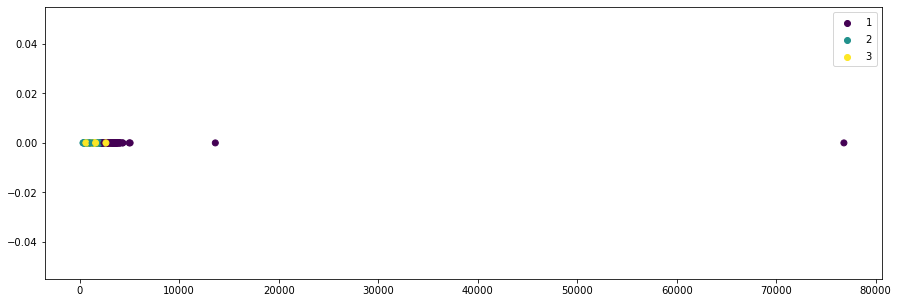

In [21]:
plt.figure(figsize=(15,5))
fig = plt.scatter(area_train,np.zeros_like(area_train),c=label_train)
plt.legend(*fig.legend_elements())

In [22]:
from skimage import measure

In [23]:
xaxis_feature = []
yaxis_feature = []

for i in range(proj.n_index):
    temp_rg = measure.regionprops((mask_img[i]))
    yaxis_feature.append( temp_rg[0].convex_image.shape[0] )
    xaxis_feature.append( temp_rg[0].convex_image.shape[1] )
xaxis_feature = np.array(xaxis_feature)
yaxis_feature = np.array(yaxis_feature)

In [24]:
xaxis_feature = xaxis_feature.reshape(-1,1)
xaxis_train,xaxis_test = train_test_split(xaxis_feature,0.7,idx)

yaxis_feature = yaxis_feature.reshape(-1,1)
yaxis_train,yaxis_test = train_test_split(yaxis_feature,0.7,idx)

In [25]:
print_class_sep(xaxis_train,label_train)

--Divergence--
D01 = 0.3229725906161506
D02 = 0.1405509535231474
D10 = 0.6310079032203395
D12 = 0.29126781895412635
D20 = 1.936641002604481
D21 = 0.9525577536679621
Divergence = 4.274998022586207
Scatter Matrix J3 = 1.0000522631076092
Fisher discriminant ratio = 0.05196319263960214
(fisher class1,2 = 0.007644533680683008),class1,3 = 0.03460071271237649),class2,3 = 0.009717946246542646)


/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: divide by zero encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: invalid value encountered in true_divide
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: divide by zero encountered in log
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))
/Users/layyer/Work/Course/image_proc_course/project/utils.py:159: RuntimeWarning: invalid value encountered in multiply
  D += np.sum(np.where(np.logical_and(p1 != 0,p2!=0), p1 * np.log(p1/p2),0))


In [26]:
print_class_sep(yaxis_train,label_train)

--Divergence--
D01 = 1.5163223322188875
D02 = 0.48474328100448405
D10 = 0.020521925185343015
D12 = 1.1481816625082932
D20 = -0.0245000064814587
D21 = 1.4695993246930512
Divergence = 4.6148685191286
Scatter Matrix J3 = 1.0190491239212798
Fisher discriminant ratio = 26.49891560254016
(fisher class1,2 = 8.217138196171554),class1,3 = 16.771852317050076),class2,3 = 1.5099250893185274)


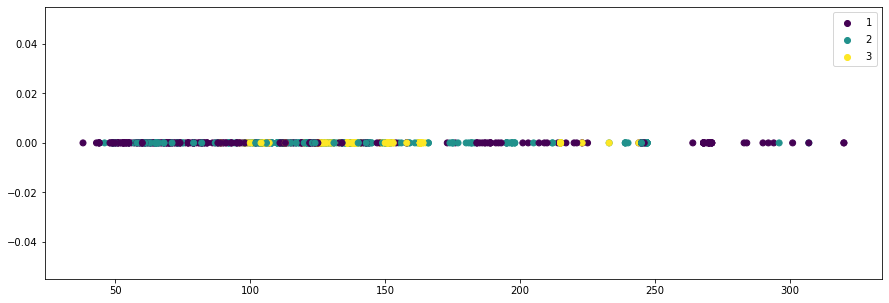

In [27]:
plt.figure(figsize=(15,5))
fig = plt.scatter(xaxis_train,np.zeros_like(area_train),c=label_train)
plt.legend(*fig.legend_elements())

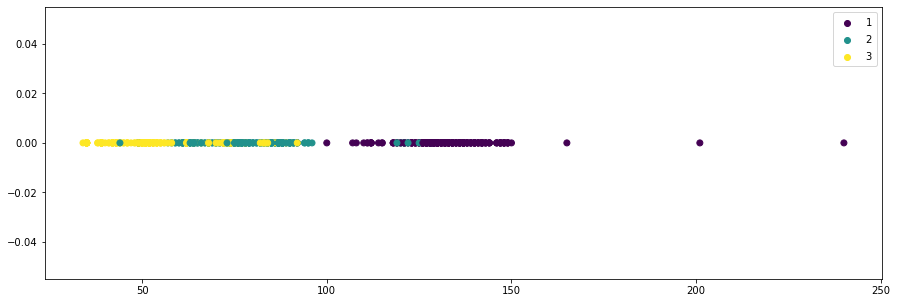

In [28]:
plt.figure(figsize=(15,5))
fig = plt.scatter(yaxis_train,np.zeros_like(area_train),c=label_train)
plt.legend(*fig.legend_elements())

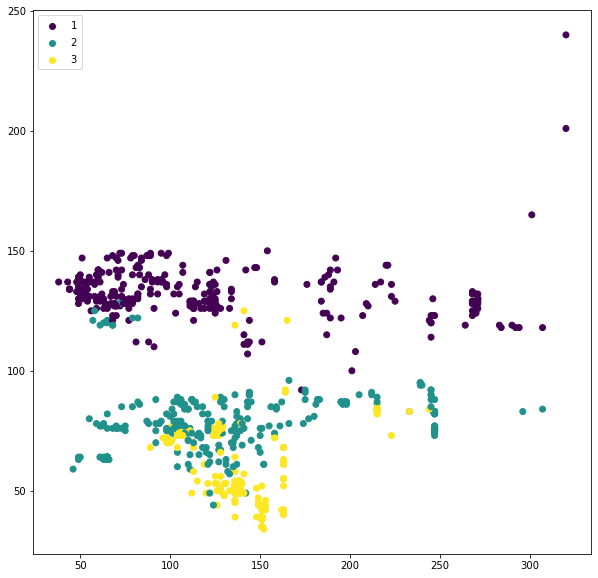

In [29]:
plt.figure(figsize=(10,10))
fig = plt.scatter(xaxis_train,yaxis_train,c=label_train)
plt.legend(*fig.legend_elements())

In [30]:
knn_rgx = KNN(n_neighbors=3)
knn_rgx.fit(xaxis_train,label_train)
print(classification_report(label_test, knn_rgx.predict(xaxis_test) ))

              precision    recall  f1-score   support

         1.0       0.66      0.72      0.69       138
         2.0       0.56      0.43      0.49       122
         3.0       0.68      0.79      0.73        95

    accuracy                           0.64       355
   macro avg       0.63      0.65      0.64       355
weighted avg       0.63      0.64      0.63       355



In [31]:
knn_rgy = KNN(n_neighbors=5)
knn_rgy.fit(yaxis_train,label_train)
print(classification_report(label_test, knn_rgy.predict(yaxis_test) ))

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       138
         2.0       0.84      0.97      0.90       122
         3.0       0.99      0.77      0.86        95

    accuracy                           0.93       355
   macro avg       0.94      0.91      0.92       355
weighted avg       0.93      0.93      0.93       355



In [32]:
xyaxis_train = np.dstack((xaxis_train,yaxis_train)).reshape(-1,2)
xyaxis_test = np.dstack((xaxis_test,yaxis_test)).reshape(-1,2)

In [33]:
xyaxis_train.shape

(826, 2)

In [38]:
knn_xy = KNN(n_neighbors=3)
knn_xy.fit(xyaxis_train,label_train)
print(classification_report(label_test, knn_xy.predict(xyaxis_test) ))

              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       138
         2.0       0.93      0.89      0.91       122
         3.0       0.89      0.93      0.91        95

    accuracy                           0.94       355
   macro avg       0.94      0.94      0.94       355
weighted avg       0.94      0.94      0.94       355



In [40]:
rg = measure.regionprops((mask_img[786]))

In [41]:
rg[0].convex_image.shape

(68, 83)

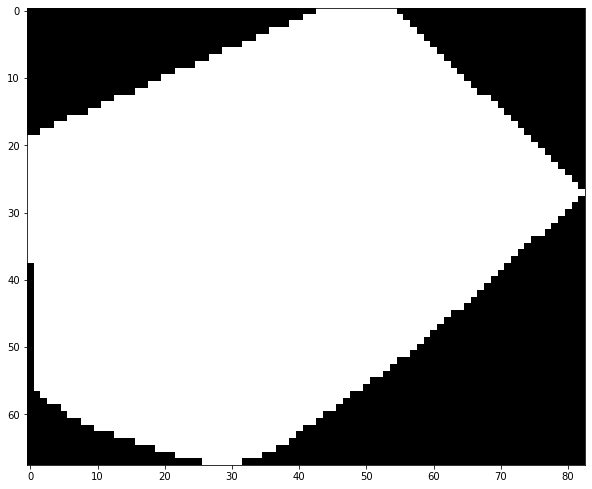

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(rg[0].convex_image,cmap='gray')

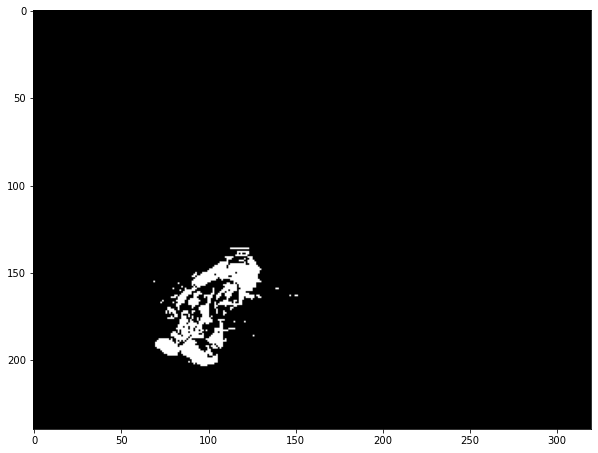

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(mask_img[786],cmap='gray')